In [7]:
import pandas as pd
import os
from matplotlib import pyplot as plt
from tqdm import tqdm
import numpy as np

In [8]:
strain = pd.read_csv("Strain.csv")
strain.head()

,Unnamed: 0,filenames,frame_num,x1,y1,error_1,x2,y2,error_2,length,angle
0,0,0X100009310A3BD7FC.avi,0,50,70,0.0,75,69,7.071068,122,-2.914794
1,1,0X100009310A3BD7FC.avi,1,50,68,1.0,71,68,9.433981,120,-2.878598
2,2,0X100009310A3BD7FC.avi,2,50,69,0.0,72,69,8.062258,124,-2.878598
3,3,0X100009310A3BD7FC.avi,3,51,68,1.0,74,68,8.246211,110,-2.868584
4,4,0X100009310A3BD7FC.avi,4,52,68,2.0,73,69,6.324555,122,-2.868584


In [10]:
strain_calc = []
file_names = []
for vid in tqdm(strain.filenames.unique()):
    temp = strain[strain.filenames == vid]
    strain_est = []
    if len(temp.frame_num)>=32:
        for frame in temp.frame_num[:-31]:
            smaller = temp[(temp.frame_num >= frame) & (temp.frame_num <( frame + 32))]
            strain_est.append(min(smaller.length)/max(smaller.length))
        strain_calc.append(np.mean(strain_est))
        plt.hist(strain_calc)
        plt.title(vid)
        plt.savefig(os.path.join('Strain Histogram',vid[:-4]+'.png'))
        plt.clf()
        plt.cla()
        plt.close()
        file_names.append(vid)

100%|██████████████████████████████████████████████████████████████████████████████| 3213/3213 [14:54<00:00,  3.59it/s]


Text(0.5, 1.0, 'Mean Strain')

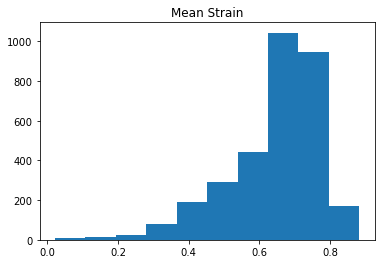

In [4]:
plt.hist(strain_calc)
plt.title("Mean Strain")

Text(0.5, 1.0, '0X36D558075BB74018.avi')

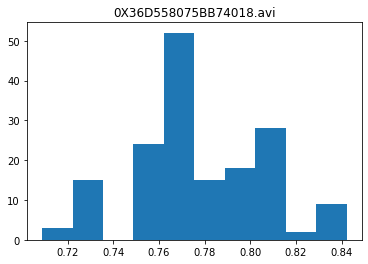

In [5]:
plt.hist(strain_est)
plt.title(vid)